In [ ]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd


<Axes: xlabel='wt', ylabel='mpg'>

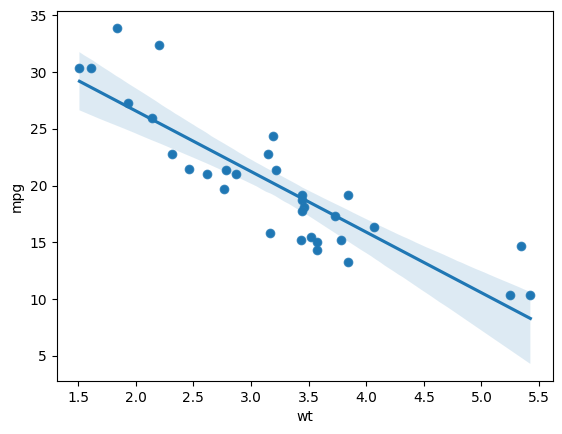

In [4]:
#Load Data
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [5]:
#Convert to tensors

x_list = cars.wt.values.tolist()
y_list = cars.mpg.values.tolist()

x = torch.tensor(x_list, dtype=torch.float64).reshape(-1,1)
y = torch.tensor(y_list, dtype=torch.float64).reshape(-1,1)

#Normalize x

x_mean = torch.mean(x)
x_std = torch.std(x)

x = (x - x_mean) / x_std

In [16]:
#Train

w = torch.rand(1,requires_grad=True,dtype=torch.float64)
v = torch.rand(1,requires_grad=True,dtype=torch.float64)
b = torch.rand(1,requires_grad=True,dtype=torch.float64)

num_epochs = 100
learning_rate = 0.001
losses = []
for epoch in range (num_epochs):
    for i in range(len(x)):
        
        y_pred = w*x[i] + v*(x[i]*x[i]) +b
        loss = (y_pred - y[i])**2
        loss.backward()

        with torch.no_grad():
            w -= learning_rate * w.grad
            v -= learning_rate * v.grad
            b -= learning_rate * b.grad

            w.grad.zero_()
            v.grad.zero_()
            b.grad.zero_()
    losses.append([epoch,loss.item()])

print('Final loss : ',losses.pop())

Final loss :  [99, 0.009483584496810058]


<Axes: >

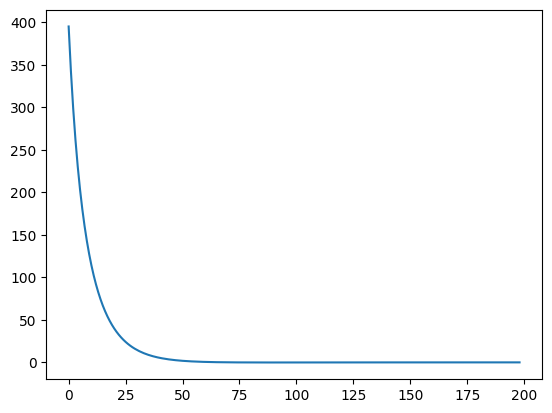

In [15]:
#Loss plot
sns.lineplot(x=np.array(losses)[:,0], y=np.array(losses)[:,1])

<Axes: >

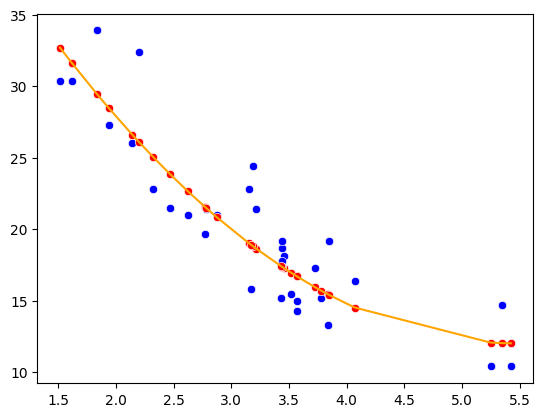

In [20]:
#final predicted function plot

y_pred = w*x+ v*(x**2)+ b
sns.scatterplot(x=x_list, y=y_list, color='blue')
sns.lineplot(x=x_list, y=y_pred.detach().numpy().reshape(-1), color='orange')
sns.scatterplot(x=x_list, y=y_pred.detach().numpy().reshape(-1), color='red')